In [1]:
# Importing Important Libraries
import pandas as pd   
import time
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
import seaborn as sns

from numpy import mean
import warnings
warnings.filterwarnings("ignore") 

## Loading Dataset and Preliminary Analysis

In [2]:
# Importing Dataset using Pandas.
data = pd.read_csv("E:/Supervised.csv")
data.shape  

(193, 21)

Our dataset contains 193 records and 21 features including the target feature.

In [3]:
data.head()

,Country,Status,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,...,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling,Life_Expectancy
0,Cook Islands,Developing,NaN,0,0.01,0.000000,98.0,0,82.8,0,...,3.58,98,0.1,NaN,NaN,0.1,0.1,NaN,NaN,NaN
1,Dominica,Developing,NaN,0,0.01,11.419555,96.0,0,58.4,0,...,5.58,96,0.1,722.756650,NaN,2.7,2.6,0.721,12.7,NaN
2,Marshall Islands,Developing,NaN,0,0.01,871.878317,8.0,0,81.6,0,...,17.24,79,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0,NaN
3,Monaco,Developing,NaN,0,0.01,0.000000,99.0,0,NaN,0,...,4.30,99,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nauru,Developing,NaN,0,0.01,15.606596,87.0,0,87.3,0,...,4.65,87,0.1,136.183210,NaN,0.1,0.1,NaN,9.6,NaN


### 1.1 Checking Target Variable

Our target variable in this task is Life Expectancy of the person. Target variable contains value ranging from 40 to 90. All values is numeric and its mean value is around 75. It alsco contains some Nan values which we will resolve in data preprocessing step. As our target variable is numerical, so we will perform regression analysis on the data to predict life expectancy.

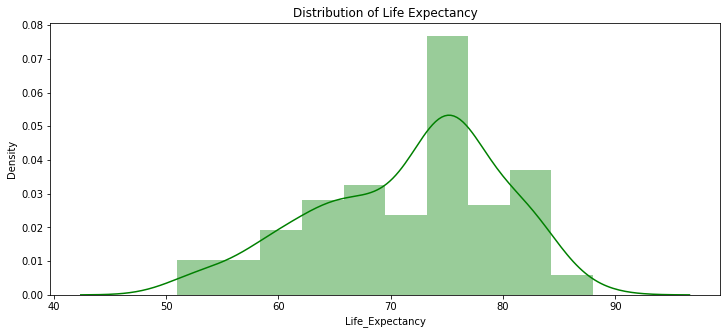

In [4]:
# Life Expectancy Distribution
plt.figure(figsize=(12,5))
plt.title("Distribution of Life Expectancy")
ax = sns.distplot(data["Life_Expectancy"], color = 'g')

In [5]:
data.describe()   # Statistical information about dataset.

,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling,Life_Expectancy
count,183.000000,193.000000,15.000000,193.000000,184.000000,193.000000,189.000000,193.000000,193.000000,12.000000,193.000000,193.000000,159.000000,1.440000e+02,189.000000,189.000000,176.000000,180.000000,183.000000
mean,152.863388,22.569948,2.690000,9.109488,82.081522,1425.031088,43.882011,29.974093,83.202073,7.935833,84.554404,0.631606,7021.962512,1.094329e+07,4.380423,4.417989,0.692727,12.785556,71.616940
std,97.561184,81.646893,3.907151,72.448163,24.771279,7642.736069,21.599148,105.170369,24.369670,4.489925,22.413454,1.315131,11549.579643,2.878857e+07,4.087889,4.168371,0.152309,3.177419,8.123706
min,1.000000,0.000000,0.010000,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,3.580000,6.000000,0.100000,33.681223,2.920000e+02,0.100000,0.100000,0.347000,0.000000,51.000000
25%,74.000000,0.000000,0.010000,0.000000,78.000000,0.000000,24.300000,0.000000,83.000000,5.347500,83.000000,0.100000,760.493500,2.207860e+05,1.500000,1.400000,0.572500,10.800000,65.750000
50%,138.000000,2.000000,0.010000,0.000000,93.000000,9.000000,51.100000,2.000000,93.000000,6.320000,94.000000,0.100000,2878.338370,1.894576e+06,3.300000,3.300000,0.723500,13.100000,73.900000
75%,213.000000,15.000000,5.285000,0.000000,97.000000,188.000000,62.100000,20.000000,97.000000,8.437500,97.000000,0.300000,6828.810680,9.846223e+06,6.400000,6.400000,0.798000,15.000000,76.950000
max,484.000000,910.000000,10.660000,871.878317,99.000000,90387.000000,87.300000,1100.000000,99.000000,17.240000,99.000000,9.300000,66346.522670,2.581621e+08,26.700000,27.300000,0.948000,20.400000,88.000000


Listing All the columns in the dataset.

In [6]:
cols = data.columns  #Listing All the columns in the dataset.
print(cols)

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_deaths', 'Alcohol',
       'Percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'Under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'Thinness_1_19_years',
       'Thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'Life_Expectancy'],
      dtype='object')


In [7]:
num_cols = data._get_numeric_data().columns  # Listing All the numeric columns in the dataset.
print(num_cols)

Index(['Adult_Mortality', 'Infant_deaths', 'Alcohol', 'Percentage_expenditure',
       'Hepatitis_B', 'Measles', 'BMI', 'Under_five_deaths', 'Polio',
       'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population',
       'Thinness_1_19_years', 'Thinness_5_9_years',
       'Income_composition_of_resources', 'Schooling', 'Life_Expectancy'],
      dtype='object')


In [8]:
categorical_colums = list(set(cols) - set(num_cols))      # Listing all the categorical columns in the dataset.
categorical_colums

['Status', 'Country']

In [9]:
data['Country'].unique()         # Checking unique values in country variable.

array(['Cook Islands', 'Dominica', 'Marshall Islands', 'Monaco', 'Nauru',
       'Niue', 'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Tuvalu',
       'Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea

In [10]:
data['Status'].unique()     # Checking unique values in Status feature.

array(['Developing', 'Developed'], dtype=object)

Now we are mapping Status column in value 1 and 2, and converting categorical column into numerical column.

In [11]:
data['Status'] = data['Status'].map({'Developing': 1, 'Developed': 2})
data['Status'] = pd.to_numeric(data['Status'])

Checking Datatypes of all the Features.

In [12]:
data.dtypes

Country                             object
Status                               int64
Adult_Mortality                    float64
Infant_deaths                        int64
Alcohol                            float64
Percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
Under_five_deaths                    int64
Polio                                int64
Total_expenditure                  float64
Diphtheria                           int64
HIV_AIDS                           float64
GDP                                float64
Population                         float64
Thinness_1_19_years                float64
Thinness_5_9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
Life_Expectancy                    float64
dtype: object

Checking Null Values in the dataset.

In [13]:
data.isna().sum()

Country                              0
Status                               0
Adult_Mortality                     10
Infant_deaths                        0
Alcohol                            178
Percentage_expenditure               0
Hepatitis_B                          9
Measles                              0
BMI                                  4
Under_five_deaths                    0
Polio                                0
Total_expenditure                  181
Diphtheria                           0
HIV_AIDS                             0
GDP                                 34
Population                          49
Thinness_1_19_years                  4
Thinness_5_9_years                   4
Income_composition_of_resources     17
Schooling                           13
Life_Expectancy                     10
dtype: int64

Replacing Null values with the mean values of the features

In [14]:
data['Adult_Mortality'].fillna(int(data['Adult_Mortality'].mean()), inplace=True)
data['Alcohol'].fillna(int(data['Alcohol'].mean()), inplace=True)
data['Hepatitis_B'].fillna(int(data['Hepatitis_B'].mean()), inplace=True)
data['BMI'].fillna(int(data['BMI'].mean()), inplace=True)
data['Total_expenditure'].fillna(int(data['Total_expenditure'].mean()), inplace=True)
data['GDP'].fillna(int(data['GDP'].mean()), inplace=True)
data['Population'].fillna(int(data['Population'].mean()), inplace=True)
data['Thinness_1_19_years'].fillna(int(data['Thinness_1_19_years'].mean()), inplace=True)
data['Thinness_5_9_years'].fillna(int(data['Thinness_5_9_years'].mean()), inplace=True)
data['Income_composition_of_resources'].fillna(int(data['Income_composition_of_resources'].mean()), inplace=True)
data['Schooling'].fillna(int(data['Schooling'].mean()), inplace=True)
data['Life_Expectancy'].fillna(int(data['Life_Expectancy'].mean()), inplace=True)

Checking Null values again after resolving all the NAN values.

In [15]:
data.isna().sum()

Country                            0
Status                             0
Adult_Mortality                    0
Infant_deaths                      0
Alcohol                            0
Percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
Thinness_1_19_years                0
Thinness_5_9_years                 0
Income_composition_of_resources    0
Schooling                          0
Life_Expectancy                    0
dtype: int64

Dropping country feature as it is categorical and contain unique values.

In [16]:
# Dropping Unnecessary Column.
data.drop('Country',axis=1,inplace=True)

Plotting correlation matrix to check correlation between the features.

<AxesSubplot:>

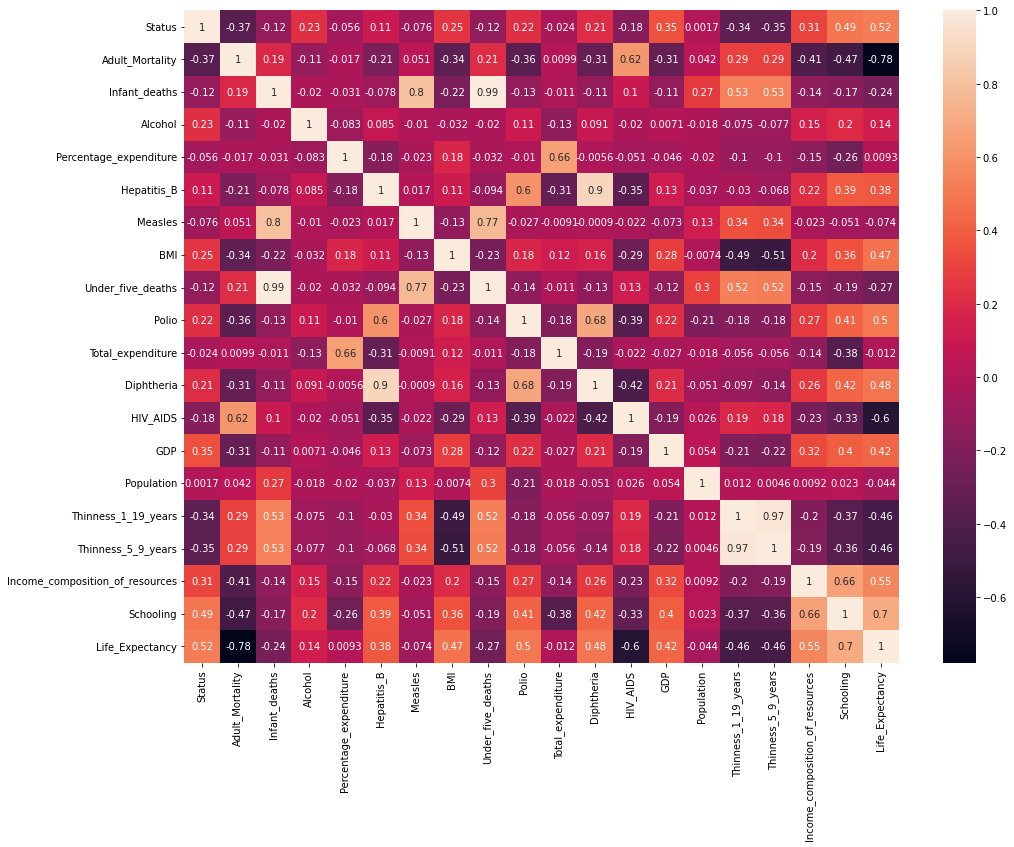

In [17]:
corr = data.corr()

# Plot the correlation matrix using seaborn's heatmap function
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True)

- If the value is close to 1, it indicates a strong positive correlation between the variables. This means that as one variable increases, the other variable is likely to increase as well.

- If the value is close to -1, it indicates a strong negative correlation between the variables. This means that as one variable increases, the other variable is likely to decrease.

- If the value is close to 0, it indicates a weak or no correlation between the variables. This means that there is no clear relationship between the variables.

So from the correlation matrix we examine that 'status', 'schooling' and 'income composition' are the features which are highly correlated with target feature. Adult Morality is the least contributing feature in the prediction of Air Quality. There is weak corelation but no Negative correlation exist in the data.

Our features in the dataset are not standardised as wea are using tree based model. so standardization is not needed for these algorithms.

## Training and Testing a Machine Learning Pipeline

In [18]:
X = data.loc[:, data.columns != 'Life_Expectancy']
y = data[['Life_Expectancy']]   #Target Feature

The pipeline we are using in this task implement decision tree regressor model because decision tree regressor can be used to predict continuous target variables. It is a simple and interpretable model that can handle both linear and non-linear relationships between inputs and outputs. We arenot doing standardisation of features in this pipeline

In [19]:
# Splitting Dataset with 70%-30% ratio.

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(135, 19)
(135, 1)
(58, 19)
(58, 1)


Applying Decision Tree Regressor model

In [20]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=20)
DT.fit(trainX, trainy)
Y_test_pred = DT.predict(testX)

print("R Square Score",DT.score(testX,testy))

print("Adjusted R Square",1 - (1-DT.score(trainX, trainy))*(len(trainy)-1)/(len(trainy)-trainX.shape[1]-1))
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(testy, Y_test_pred))
print("Coefficient of determination: %.3f" % r2_score(testy, Y_test_pred))

R Square Score 0.819811217595439
Adjusted R Square 1.0
Mean squared error: 13.97
Coefficient of determination: 0.820


The mean squared error (MSE) is a measure of the difference between the predicted and actual values of a target variable. A lower MSE of 13.97 indicates a better fit of the model to the data. 

Our R-square score is 0.819 which can be improved further by tuning the pipeline. so for that reason we are performing grid search and k-fold cross validation. 

## Tuning the proposed machine learning pipeline

Tuning a machine learning pipeline involves adjusting the parameters of the various components of the pipeline in order to optimize the performance of the model. There are several reasons why it is important to tune a machine learning pipeline such as it improves the model's accuracy and reduce overfitting.

K-fold cross-validation is a technique that can be used to further evaluate the performance of a model. It involves splitting the data into k subsets, or "folds," and then training and evaluating the model k times, with a different fold being used as the test set each time. The performance metric is then averaged across all k iterations. K-fold cross-validation can provide a more robust estimate of model performance, as it allows the model to be evaluated on multiple different test sets.

In [21]:
# Implementing K - FOLD cross validation with 5folds
from sklearn.model_selection import cross_val_score

# initialize decision tree regressor
regressor = DecisionTreeRegressor()
regressor.fit(trainX, trainy)
folds = 5
scores = cross_val_score(regressor, X, y, cv=folds)

y_pred = regressor.predict(testX)
mse = mean_squared_error(testy, y_pred)
r2 = r2_score(testy, y_pred)

print(f'Cross Validation Scores: {scores}')
print(f'Mean Cross Validation Score: {scores.mean()}')
print(f'Test MSE: {mse}')
print('------------------------------------------------')

print(f'Cross Validation R2 Scores: {scores}')
print(f'Mean Cross Validation R2 Score: {scores.mean()}')
print(f'Test R2: {r2}')


Cross Validation Scores: [0.60487138 0.79093078 0.69916498 0.80082758 0.78250735]
Mean Cross Validation Score: 0.7356604153562885
Test MSE: 13.880344827586207
------------------------------------------------
Cross Validation R2 Scores: [0.60487138 0.79093078 0.69916498 0.80082758 0.78250735]
Mean Cross Validation R2 Score: 0.7356604153562885
Test R2: 0.8209720329236612


When building a decision tree model, there are several hyperparameters that can be tuned to improve the performance of the model. Some of the most commonly tuned hyperparameters are:

1- max depth: The maximum depth of the tree, or the number of levels in the tree. Increasing the maximum depth of the tree allows for more complex models that can capture more intricate patterns in the data, but it also increases the risk of overfitting.

2- min sample split: The minimum number of samples required to split an internal node. Increasing the minimum number of samples required to split an internal node makes the tree more conservative, which can reduce overfitting.

3- min sample leaf: The minimum number of samples required to be at a leaf node. Increasing the minimum number of samples required to be at a leaf node makes the tree more conservative, which can reduce overfitting.

These hyperparameters play a role in the bias-variance trade-off, which is the balance between a model that is too simple (high bias) and a model that is too complex (high variance).

By tuning these hyperparameters, we can control the complexity of the model and find the right balance between bias and variance. A model with a high maximum depth, low min sample split and leaf will have a high variance and low bias; whereas a model with a low maximum depth, high min sample split and leaf will have a low variance and high bias. By tuning these hyperparameters, we can find the right balance between bias and variance that results in the best performance on the test set.

In [22]:
# define the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 4, 6, 8, 10]}

# perform grid search with 5-fold cross validation
grid_search = GridSearchCV(regressor, param_grid, cv=5)
grid_search.fit(trainX, trainy)

# print the best parameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# evaluate the performance of the regressor on the test set
y_pred = grid_search.predict(testX)
mse = mean_squared_error(testy, y_pred)
print(f'Test MSE: {mse}')
r2 = r2_score(testy, y_pred)
print(f'Test R2: {r2}')

Best Parameters:  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score:  0.7257731805618265
Test MSE: 9.81879546832356
Test R2: 0.8733576857299139


Implementing model on the best hyperparameters.

In [23]:
DT = DecisionTreeRegressor(max_depth =  6, min_samples_leaf = 2, min_samples_split = 4)
DT.fit(trainX, trainy)
Y_test_pred = DT.predict(testX)

print("R Square Score",DT.score(testX,testy))

print("Adjusted R Square",1 - (1-DT.score(trainX, trainy))*(len(trainy)-1)/(len(trainy)-trainX.shape[1]-1))
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(testy, Y_test_pred))
print("Coefficient of determination: %.3f" % r2_score(testy, Y_test_pred))

R Square Score 0.8602761014120438
Adjusted R Square 0.9617815911928864
Mean squared error: 10.83
Coefficient of determination: 0.860


So after tuning the hyperparameters our R-Square score increases from 0.81 to 0.86 and MSE also decreases from 15 to 10.83.

## Discussion : pros/cons and time complexity of the designed pipeline.

The time complexity of training a decision tree model is generally O(n*m log(n)), where n is the number of samples in the training set, and m is the number of features. This is because building a decision tree involves repeatedly splitting the data based on the values of the features, which takes O(n log(n)) time for each split, and this process is repeated for all the features.

The time complexity of predicting using a decision tree model is O(log(n)), where n is the number of samples in the training set. This is because making a prediction involves traversing down the tree from the root to a leaf node, which takes O(log(n)) time in the worst case.

The most time consuming step in training this pipeline is training the mode. The training step is the most time-consuming step in the decision tree pipeline. This is where the model is trained to make predictions. The time required to train the model is directly proportional to the size of the dataset.

The second most time consuming step is tuning the hyperparameters of the model to find the optimal settings that result in the best performance. This step can be time-consuming, especially when working with large datasets and a large number of hyperparameters to tune.

Decision tree pipeline is a widely used machine learning technique that has several strengths and limitations.

Strengths:

1- It is easy to understand and interpret, as they generate a human-readable tree-based representation of the decision-making process.

2- Decision tree models pipeline can handle both linear and non-linear relationships between inputs and outputs.

3- The pipeline can handle large amounts of data and deal with missing values.

4- Pipeline can handle categorical variables, which is useful in many real-world problems.

5- pipeline is robust to outliers, which makes them suitable for datasets with noise.

Limitations:

1- Decision tree models pipeline are prone to overfitting, especially when the tree becomes too deep.

2- This pipeline are biased towards features with more levels, which can lead to suboptimal decision boundaries.

3- pipeline is not good with high-dimensional data, which can lead to poor performance and high computational costs.

We can further improve our results by performing feature engineering and selection to select the most impactful features which are contributing positively in the prediction of target.